# LAB 4 TASK 2

 Apply algorithm on wine dataset - LabelEncoding of features: and Train test Division 66%-34%

In [3]:
from sklearn.datasets import load_wine
X,y = load_wine(return_X_y=True)

In [4]:
print("Features shape : ",X.shape)
print("Label shape: ",y.shape)

Features shape :  (178, 13)
Label shape:  (178,)


In [5]:
print(X[0])

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]


In [6]:
label = ['Benign','Malignant']
print(label[y[0]])

Benign


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=134)

In [17]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.819672131147541


In [18]:
#create confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[11,  7,  0],
       [ 1, 25,  0],
       [ 1,  2, 14]])

In [19]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test,y_pred,average='macro')
recall = recall_score(y_test,y_pred,average='macro')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

precision: 0.8604826546003017
recall: 0.798726328138093


In [26]:
y_pred = clf.predict(X[20].reshape(1,-1))
print("Predicted : ",label[int(y_pred)])
print("Actual : ",label[y[20]])

Predicted :  Malignant
Actual :  Benign


In [33]:
load_wine().target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [34]:
load_wine().feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

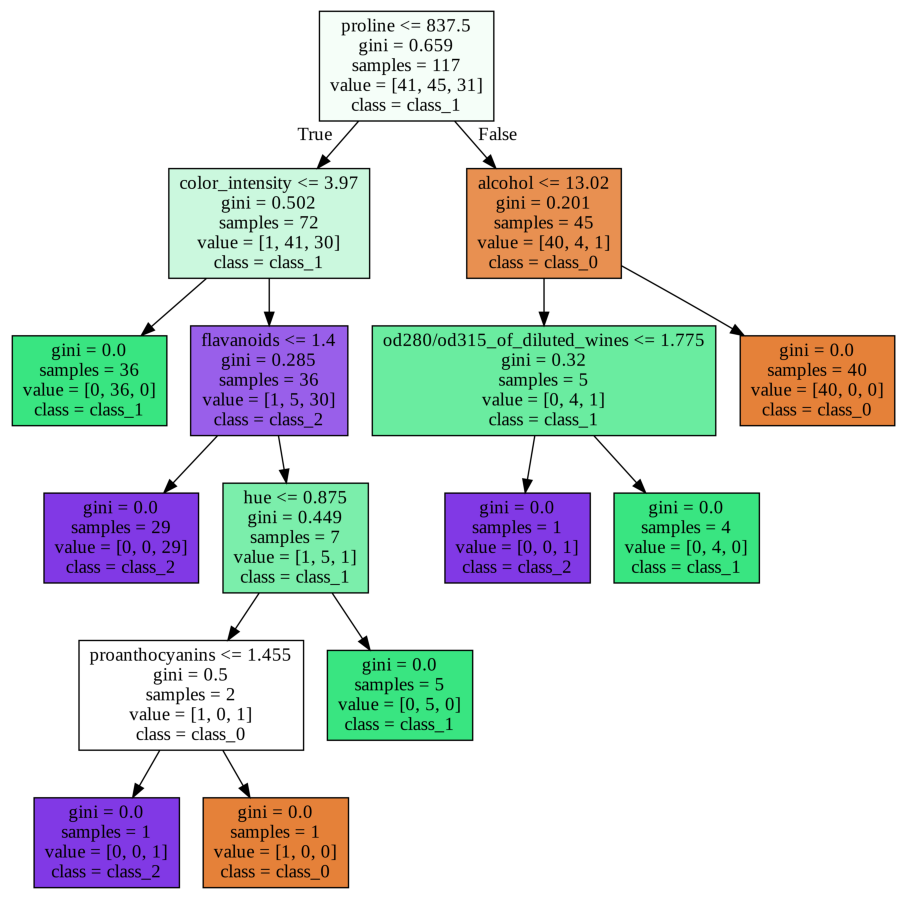

In [32]:
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='tree_entropy.dot',
               feature_names=['alcohol',
                              'malic_acid',
                              'ash',
                              'alcalinity_of_ash',
                              'magnesium',
                              'total_phenols',
                              'flavanoids',
                              'nonflavanoid_phenols',
                              'proanthocyanins',
                              'color_intensity',
                              'hue',
                              'od280/od315_of_diluted_wines',
                              'proline'],
               class_names=['class_0','class_1','class_2'],
                filled=True)
#Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600'])

#Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 20))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();